In [2]:
from pydlr import dlr
import matplotlib.pyplot as plt
import numpy as np
from functions import *

In [3]:
E_max, beta = 10., 20.
d = dlr(lamb=beta * E_max, eps=1e-12)

w_x = d.dlrrf/beta  # real frequency grid
tau_l = d.get_tau(beta)  # time tau grid
iw_q = d.get_matsubara_frequencies(beta)  # matsubara frequency grid

pts = [(w_x, r'Real frequency DLR points $\omega_x$'),
       (tau_l, r'Imaginary time DLR points $\tau_l$'),
       (iw_q.imag, r'Matsubara frequency DLR points $i\omega_q$')]

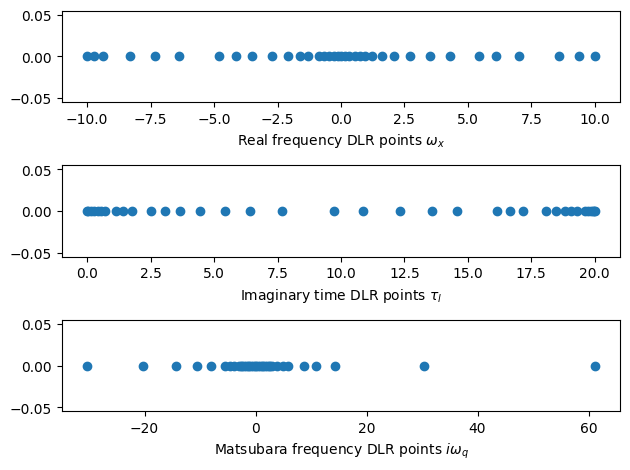

In [4]:
subp = [3, 1, 1]
for val, label in pts:
    plt.subplot(*subp)
    subp[-1] += 1
    plt.plot(val, 0 * val, 'o')
    plt.xlabel(label)
plt.tight_layout()
plt.show()

In [5]:
print(len(w_x))

36


Now we should create a Green function in the matsubara points of DLR representation.
A is a spectral function of bethe lattice
$$
G(i\omega) = \int \frac{A(w)}{i\omega - w} dw
$$

$G(i\omega_{DLR}) \rightarrow A_x$ pole weights

Recovered from poles
$$
G(i\omega) = \sum_{DLR} \frac{A_x}{i\omega - w_x}
$$

In [6]:
G_iw_q = get_G_iw(iw_q, a=2) # points in what create Green function should be matsubara points of DLR
A_x = d.dlr_from_matsubara(G_iw_q, beta) # spectral weights that represents poles weights of the Green function

In [7]:
iw = matsubara("F", n=np.arange(-20, 20), beta=beta) 
G_iw = get_G_iw(iw*1j, a=2) #Original green function

In [8]:
# Recovered green function
G_iw_recovered = get_GF_from_DLR_iw(iw*1j, -A_x, w_x)

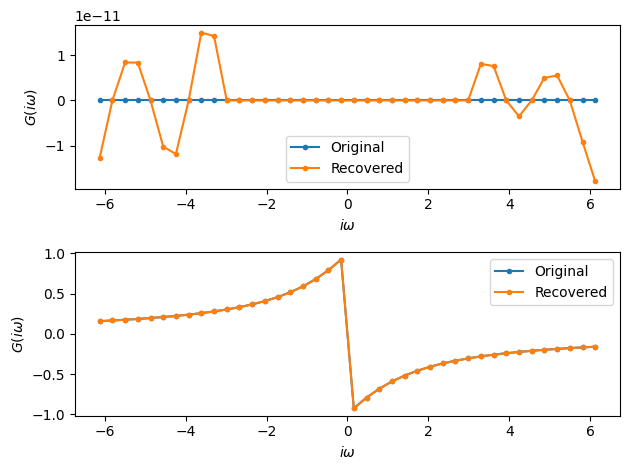

In [9]:
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(iw, np.real(G_iw), marker=".", label="Original")
plt.plot(iw, np.real(G_iw_recovered), marker=".", label="Recovered")
plt.ylabel(r"$G(i\omega)$")
plt.xlabel(r"$i\omega$")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(iw, np.imag(G_iw), marker=".", label="Original")
plt.plot(iw, np.imag(G_iw_recovered), marker=".", label="Recovered")
plt.ylabel(r"$G(i\omega)$")
plt.xlabel(r"$i\omega$")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# But how it recovers real Frequency
w = np.linspace(-4, 4, 100)
G_w_rf = get_G_iw(w+0.1*1j, a=2)
G_w_rf_recovered = get_GF_from_DLR_iw(w + 0.1*1j, -A_x, w_x)

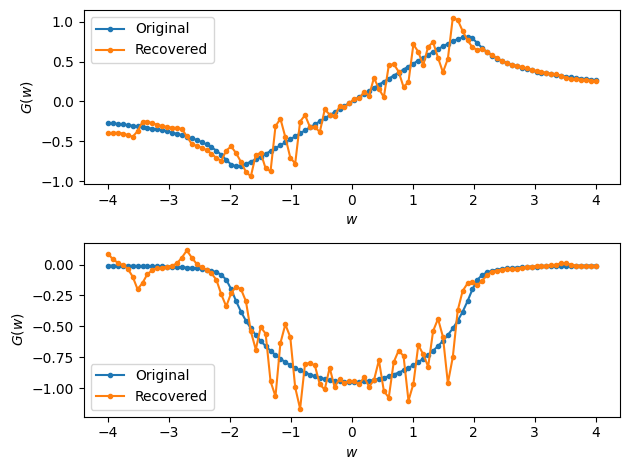

In [12]:
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(w, np.real(G_w_rf), marker=".", label="Original")
plt.plot(w, np.real(G_w_rf_recovered), marker=".", label="Recovered")
plt.ylabel(r"$G(w)$")
plt.xlabel(r"$w$")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(w, np.imag(G_w_rf), marker=".", label="Original")
plt.plot(w, np.imag(G_w_rf_recovered), marker=".", label="Recovered")
plt.ylabel(r"$G(w)$")  
plt.xlabel(r"$w$")
plt.legend()
plt.tight_layout()
plt.show()